Pridicting the item categroy from pakistan largest E-Commerce dataset. In this task i have spilited the dataset and trained using logistic regression.

In [19]:
#importing libraries
import pandas as pb 
import matplotlib.pyplot as plt
import numpy as np 
# load dataset.
data= pb.read_csv('../input/pakistans-largest-ecommerce-dataset/Pakistan Largest Ecommerce Dataset.csv')
data.info()

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3156: DtypeWarning: Columns (1,2,3,7,8,9,11,12,13,14,17,18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   item_id                584524 non-null  float64
 1   status                 584509 non-null  object 
 2   created_at             584524 non-null  object 
 3   sku                    584504 non-null  object 
 4   price                  584524 non-null  float64
 5   qty_ordered            584524 non-null  float64
 6   grand_total            584524 non-null  float64
 7   increment_id           584524 non-null  object 
 8   category_name_1        584360 non-null  object 
 9   sales_commission_code  447349 non-null  object 
 10  discount_amount        584524 non-null  float64
 11  payment_method         584524 non-null  object 
 12  Working Date           584524 non-null  object 
 13  BI Status              584524 non-null  object 
 14   MV                    584524 non-

In [20]:
#creating a sub dataset with needed columns and negleting others.
data_sub = data[['Month', 'item_id','Year','qty_ordered','category_name_1', 'grand_total','price','qty_ordered','discount_amount']]
data_sub

,Month,item_id,Year,qty_ordered,category_name_1,grand_total,price,qty_ordered,discount_amount
0,7.0,211131.0,2016.0,1.0,Women's Fashion,1950.0,1950.0,1.0,0.0
1,7.0,211133.0,2016.0,1.0,Beauty & Grooming,240.0,240.0,1.0,0.0
2,7.0,211134.0,2016.0,1.0,Women's Fashion,2450.0,2450.0,1.0,0.0
3,7.0,211135.0,2016.0,1.0,Beauty & Grooming,60.0,360.0,1.0,300.0
4,7.0,211136.0,2016.0,2.0,Soghaat,1110.0,555.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...
1048570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# removing NaN and null values from dataset
data_sub.dropna(how='all', inplace=True)
data_sub.sort_index(ascending=False)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Month,item_id,Year,qty_ordered,category_name_1,grand_total,price,qty_ordered,discount_amount
584523,8.0,905208.0,2018.0,2.0,Mobiles & Tablets,652178.0,108640.0,2.0,0.0
584522,8.0,905207.0,2018.0,2.0,Mobiles & Tablets,652178.0,87300.0,2.0,0.0
584521,8.0,905206.0,2018.0,2.0,Mobiles & Tablets,652178.0,129999.0,2.0,0.0
584520,8.0,905205.0,2018.0,1.0,Mobiles & Tablets,35899.0,35599.0,1.0,0.0
584519,8.0,905204.0,2018.0,1.0,Women's Fashion,849.0,699.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
4,7.0,211136.0,2016.0,2.0,Soghaat,1110.0,555.0,2.0,0.0
3,7.0,211135.0,2016.0,1.0,Beauty & Grooming,60.0,360.0,1.0,300.0
2,7.0,211134.0,2016.0,1.0,Women's Fashion,2450.0,2450.0,1.0,0.0
1,7.0,211133.0,2016.0,1.0,Beauty & Grooming,240.0,240.0,1.0,0.0


In [22]:
#removing NUll from remaning columns.
data_sub.dropna(inplace=True)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
# checking no null value remains.
print(data_sub.isnull().sum())

Month              0
item_id            0
Year               0
qty_ordered        0
category_name_1    0
grand_total        0
price              0
qty_ordered        0
discount_amount    0
dtype: int64


Model prediction part using logistic regression.

In [25]:
# for model prediction creating labels and features.
y=data_sub['category_name_1']
x=data_sub.drop('category_name_1', axis=1)

In [26]:
#train test and split the data
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest=train_test_split(x,y, test_size=0.2)

In [27]:
# check the dimentions of the splited data.
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(467488, 8)
(116872, 8)
(467488,)
(116872,)


In [28]:
# fit model using logistic regresion.
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(xtrain,ytrain)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [37]:
# model prediction for xtest data.
prediction=model.predict(xtest)
prediction

array(['Mobiles & Tablets', "Men's Fashion", 'Mobiles & Tablets', ...,
       'Mobiles & Tablets', 'Mobiles & Tablets', "Men's Fashion"],
      dtype=object)

In [31]:
# model accuracy and classification.
from sklearn.metrics import classification_report
print(classification_report(ytest,prediction))

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                    precision    recall  f1-score   support

        Appliances       0.00      0.00      0.00     10453
 Beauty & Grooming       0.00      0.00      0.00      8328
             Books       0.00      0.00      0.00       377
         Computing       0.20      0.00      0.00      3174
     Entertainment       0.16      0.00      0.00      5406
   Health & Sports       0.00      0.00      0.00      3475
     Home & Living       0.00      0.00      0.00      5291
       Kids & Baby       0.00      0.00      0.00      3349
     Men's Fashion       0.22      0.90      0.35     18393
 Mobiles & Tablets       0.39      0.68      0.49     23095
            Others       0.00      0.00      0.00      5742
School & Education       0.00      0.00      0.00       678
           Soghaat       0.00      0.00      0.00      6766
        Superstore       0.00      0.00      0.00      8907
   Women's Fashion       0.07      0.00      0.00     11813
                \N       0.00      0.00

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


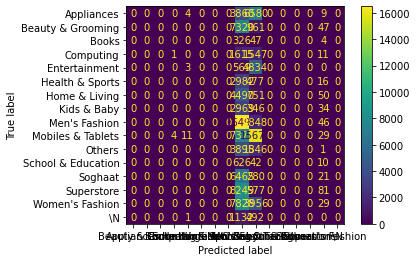

In [32]:
#confusion matrix for model
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model,xtest,ytest)